In [1]:
from cross_runs_TF_planes import CrossRunsTFScorer
import pickle
from typing import Any
import re
import matplotlib
from mne.time_frequency import tfr_morlet
import matplotlib.pyplot as plt
import os
import mne
import numpy as np

def range_to_float(str_range: str) -> tuple[float, float]:

    expr1 = r'.*\d-'
    find1 = re.findall(expr1, str_range)[0][:-1]
    expr2 = r'(\d--\d.*)|(\d-\d.*)'
    res = re.findall(expr2, str_range)[0]
    find2 = res[0][2:] if res[0] != '' else res[1][2:]

    return float(find1), float(find2)

def read_pkl(path: str) -> Any:
    content = pickle.load(
        open(
            path,
            'rb'
        )
    )
    return content

In [2]:
from utils.data_management import dict2str

INCLUDED_SESSIONS = ['B1_', 'B10']
INCLUDED_TRIALS = ['RespCor']
INCLUDED_CASES = ['LI', 'LM', 'RI', 'RM']

epochs = dict()

root = '../Source/Subjects'

subjects_dir = '../Source/Subjects'

best_configs = dict()

for subject in os.listdir(subjects_dir):
    if subject not in best_configs:
        best_configs.update({subject: {}})
    tf_planes_dir = os.path.join(subjects_dir, subject, 'TF_planes')
    for session in os.listdir(tf_planes_dir):
        if session not in best_configs[subject]:
            best_configs[subject].update({session: {}})
        session_dir = os.path.join(tf_planes_dir, session)
        for lock in os.listdir(session_dir):
            if lock not in best_configs[subject][session]:
                best_configs[subject][session].update({lock: {}})
            lock_dir = os.path.join(session_dir, lock)
            for case in os.listdir(lock_dir):
                tf_planes = read_pkl(os.path.join(lock_dir, case))
                mean_acc = tf_planes.tf_windows_mean()
                highest = dict()
                for freq in mean_acc:
                    for time in mean_acc[freq]:
                        if len(highest) < 1:
                            highest[(
                                range_to_float(freq),
                                range_to_float(time)
                            )] = mean_acc[freq][time]
                        else:
                            new_highest = highest.copy()
                            for key in highest:
                                if highest[key] < mean_acc[freq][time]:
                                    del new_highest[key]
                                    new_highest[(
                                        range_to_float(freq),
                                        range_to_float(time)
                                    )] = mean_acc[freq][time]
                                    break
                            highest = dict(
                                sorted(
                                    new_highest.items(),
                                    key= lambda item: item[1],
                                    reverse=True
                                )
                            )
                best_configs[subject][session][lock][case] = highest

print(dict2str(best_configs))

  {
   Ga_Fed_06: {
     B10: {
       RespCor: {
         lm_vs_li.pkl: {
           ((45.08963302963663, 70.00000000000001), (-0.12164431870588104, 0.12164431870588081)): 0.8064747474747475,
          }
         left_vs_right.pkl: {
           ((29.043928667818527, 45.08963302963663), (0.01115166087479913, 0.38884833912520056)): 0.9140012077294686,
          }
         rm_vs_ri.pkl: {
           ((45.08963302963663, 70.00000000000001), (0.07835568129411892, 0.3216443187058808)): 0.29883333333333334,
          }
        }
      }
     B1: {
       RespCor: {
         lm_vs_li.pkl: {
           ((12.050711320876154, 18.708286933869708), (-0.5, 0.15515136364494292)): 0.8175959595959595,
          }
         left_vs_right.pkl: {
           ((29.043928667818527, 45.08963302963663), (-0.2888483391252008, 0.08884833912520063)): 0.8167124183006537,
          }
         rm_vs_ri.pkl: {
           ((18.708286933869708, 29.043928667818527), (-0.5, -0.10681988629015482)): 0.7975000000000001,
   

In [3]:
for subject in os.listdir(root):
    for epoch_file in os.listdir(os.path.join(root, subject, 'Epochs')):
        for session in INCLUDED_SESSIONS:
            if session in epoch_file:
                for trial in INCLUDED_TRIALS:
                    if trial in epoch_file:
                        for case in INCLUDED_CASES:
                            if case in epoch_file:
                                if subject not in epochs:
                                    epochs.update({subject: dict()})
                                if session not in epochs[subject]:
                                    epochs[subject].update({session: dict()})
                                if trial not in epochs[subject][session]:
                                    epochs[subject][session].update({trial: dict()})
                                if case not in epochs[subject][session][trial]:
                                    epochs[subject][session][trial].update({
                                        case: mne.read_epochs(
                                            os.path.join(root, subject, 'Epochs', epoch_file)
                                        )
                                    })

                            else:
                                continue
                    else:
                        continue
            else:
                continue

Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LI_B10_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_324017/3492580779.py:17: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LI_B10_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  case: mne.read_epochs(


Not setting metadata
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LI_B1_epochs.fif ...


/tmp/ipykernel_324017/3492580779.py:17: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  case: mne.read_epochs(


    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Adding metadata with 3 columns
Replacing existing metadata with 3 columns
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LM_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_324017/3492580779.py:17: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  case: mne.read_epochs(


Not setting metadata
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LM_B10_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_324017/3492580779.py:17: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_LM_B10_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  case: mne.read_epochs(


Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RI_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_324017/3492580779.py:17: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  case: mne.read_epochs(


Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RI_B10_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_324017/3492580779.py:17: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RI_B10_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  case: mne.read_epochs(


Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RM_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_324017/3492580779.py:17: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  case: mne.read_epochs(


Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RM_B10_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_324017/3492580779.py:17: RuntimeWarning: This filename (../Source/Subjects/Ga_Fed_06/Epochs/RespCor_RM_B10_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  case: mne.read_epochs(


Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Fe_To_08/Epochs/RespCor_LI_B1_epochs.fif ...


/tmp/ipykernel_324017/3492580779.py:17: RuntimeWarning: This filename (../Source/Subjects/Fe_To_08/Epochs/RespCor_LI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  case: mne.read_epochs(


AttributeError: 'NoneType' object has no attribute 'kind'

In [ ]:
from mne.time_frequency import AverageTFR

baselined_data = dict()

for subject, subject_content in epochs.items():
    if subject not in baselined_data:
        baselined_data.update({subject: {}})
    for session, session_content in subject_content.items():
        if session not in baselined_data[subject]:
            baselined_data[subject].update({session: {}})
        for trial, trial_content in session_content.items():
            if trial not in baselined_data[subject][session]:
                baselined_data[subject][session].update({trial: {}})
            for case, epoch in trial_content.items():
                freqs = np.logspace(*np.log10([5, 70]), num=7)
                n_cycles = freqs / 2.
                power, itc = tfr_morlet(epoch, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                                        return_itc=True, decim=3, n_jobs=1)
                del epoch
                epochs[subject][session][trial][case] = None

                F = np.mean(np.mean(power.data, axis=0), axis=1)
                _, _, n_times = power.data.shape
                baselineF = np.array([
                    F for _ in range(n_times)
                ]).T
                data_normalized = np.array([
                    row/baselineF
                    for row in power.data
                ])
                power = AverageTFR(
                    power.info,
                    data_normalized,
                    power.times,
                    power.freqs,
                    power.nave,
                    power.comment,
                    power.method
                )
                if case not in baselined_data[subject][session][trial]:
                    baselined_data[subject][session][trial].update({case: power})

                # plt.rcParams["figure.figsize"] = (15, 10)
                # power.plot_topo(
                #     mode='logratio',
                #     title=f'Average power, '
                #           f'{subject}, {session}, {trial}, {case}',
                #     fig_facecolor='w',
                #     font_color='black',
                #     vmin=0., vmax=5
                # )
del epochs

Average power, Ga_Fed_06, B10, RespCor, LI - LM, 45.09 - 70.0, -0.12 - 0.12
No baseline correction applied


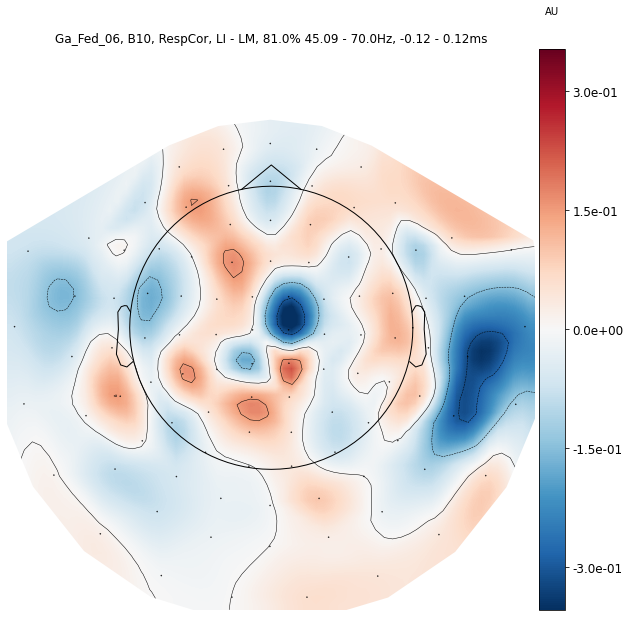

Average power, Ga_Fed_06, B10, RespCor, RI - RM, 45.09 - 70.0, 0.08 - 0.32
No baseline correction applied


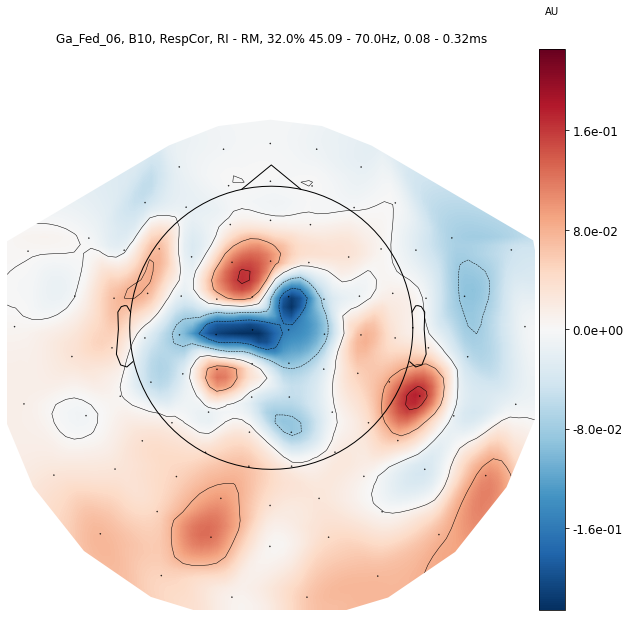

Average power, Ga_Fed_06, B1, RespCor, LI - LM, 12.05 - 18.71, -0.5 - 0.16
No baseline correction applied


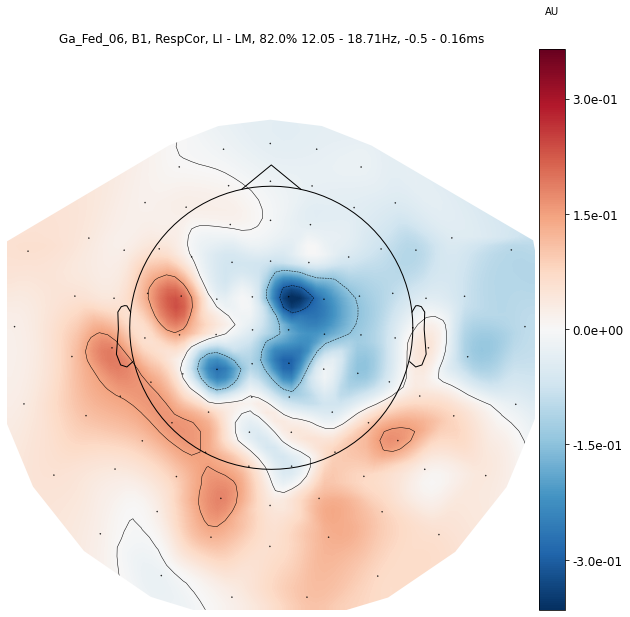

Average power, Ga_Fed_06, B1, RespCor, RI - RM, 45.09 - 70.0, -0.02 - 0.22
No baseline correction applied


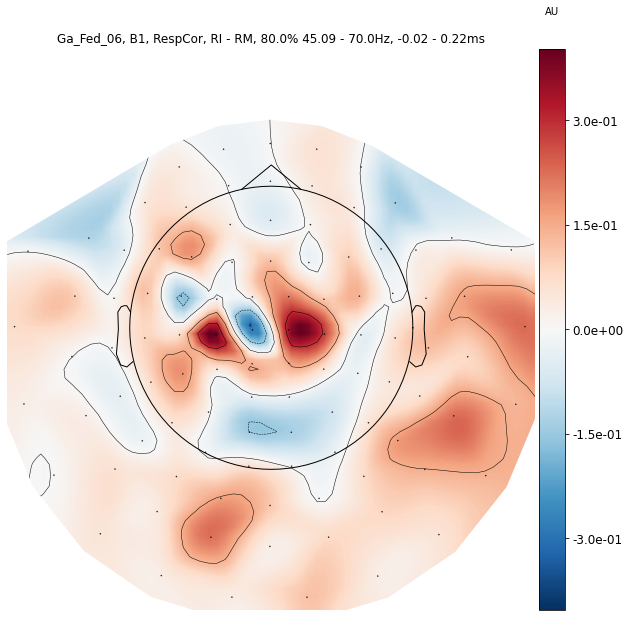

Average power, Fe_To_08, B1, RespCor, LI - LM, 45.09 - 70.0, 0.18 - 0.42
No baseline correction applied


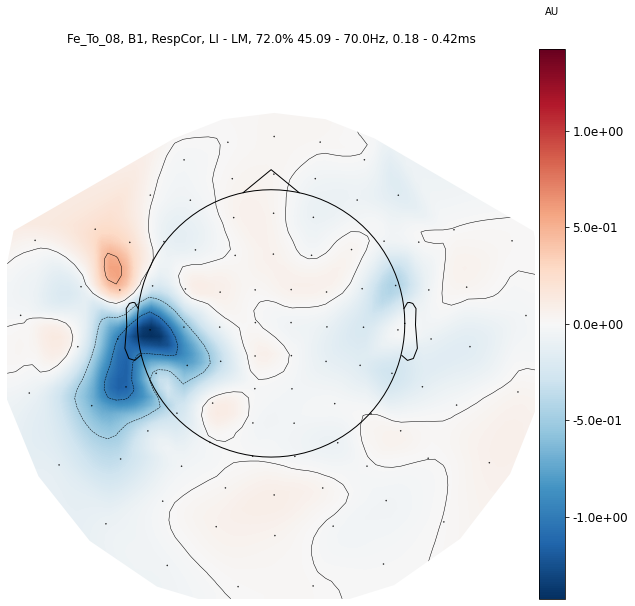

Average power, Fe_To_08, B1, RespCor, RI - RM, 12.05 - 18.71, -0.5 - 0.06
No baseline correction applied


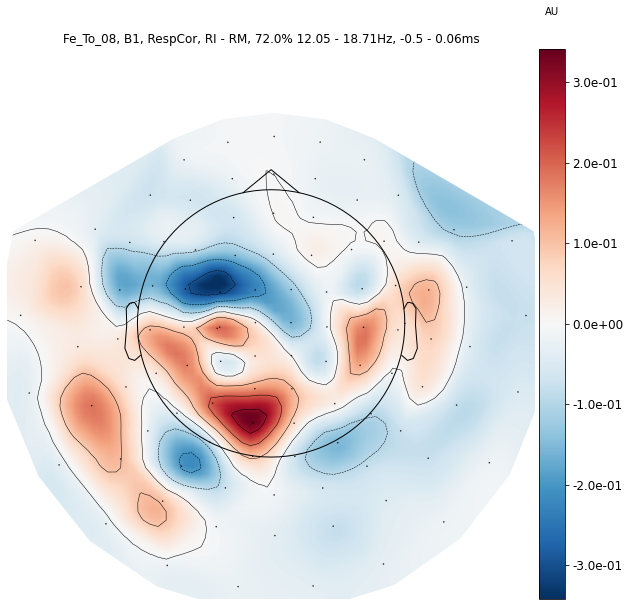

Average power, Fe_To_08, B10, RespCor, LI - LM, 29.04 - 45.09, 0.01 - 0.39
No baseline correction applied


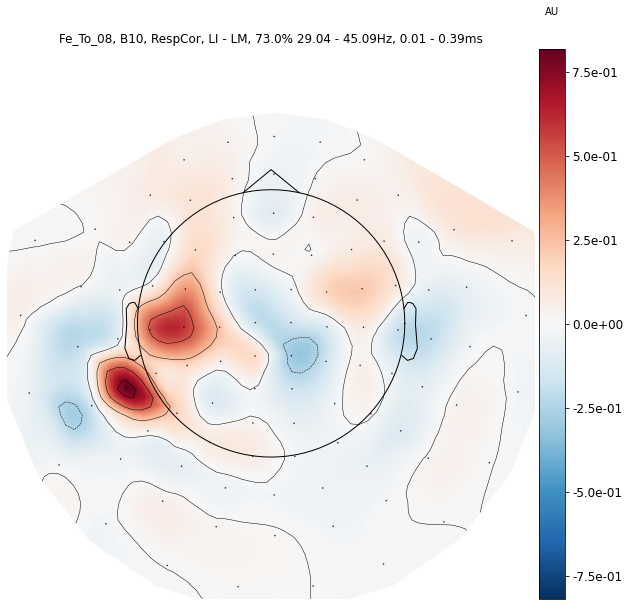

Average power, Fe_To_08, B10, RespCor, RI - RM, 45.09 - 70.0, 0.38 - 0.5
No baseline correction applied


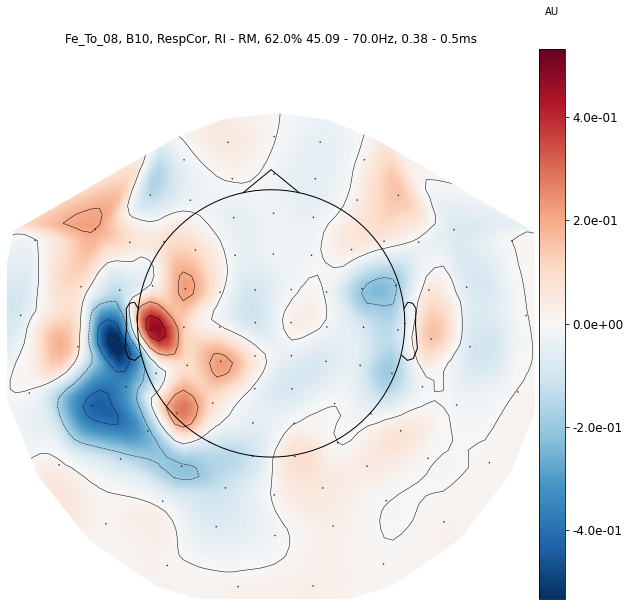

Average power, Az_Mar_05, B10, RespCor, LI - LM, 45.09 - 70.0, -0.32 - -0.08
No baseline correction applied


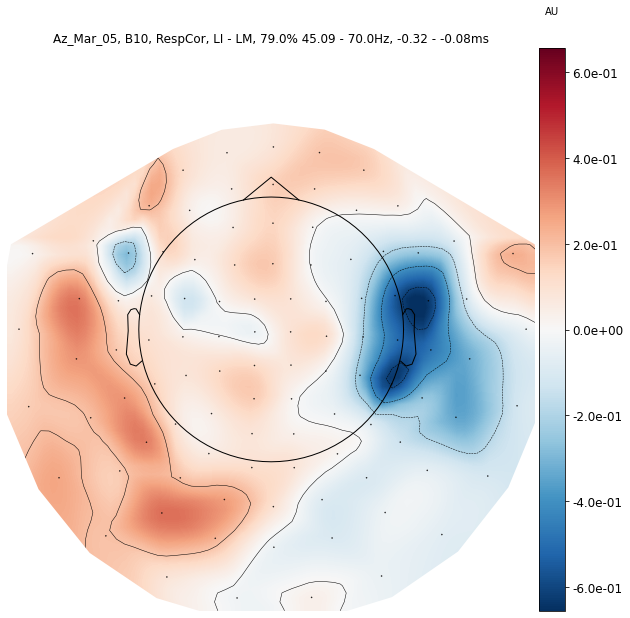

Average power, Az_Mar_05, B10, RespCor, RI - RM, 29.04 - 45.09, -0.29 - 0.09
No baseline correction applied


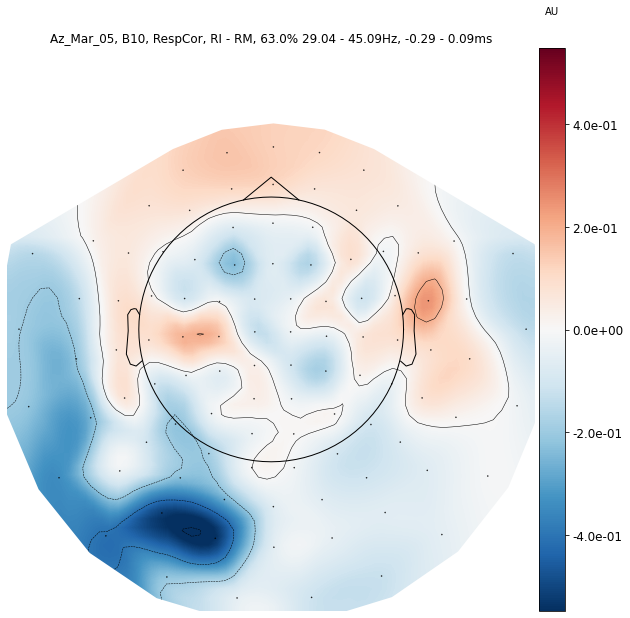

Average power, Az_Mar_05, B1, RespCor, LI - LM, 12.05 - 18.71, -0.5 - 0.06
No baseline correction applied


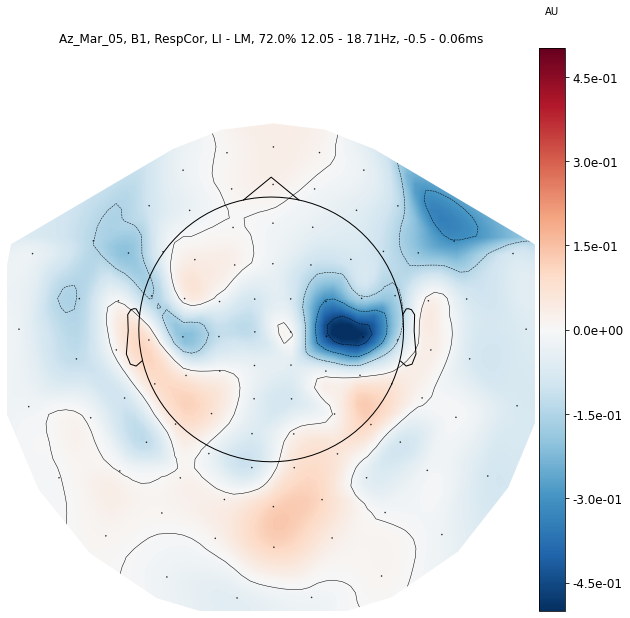

Average power, Az_Mar_05, B1, RespCor, RI - RM, 29.04 - 45.09, -0.49 - -0.11
No baseline correction applied


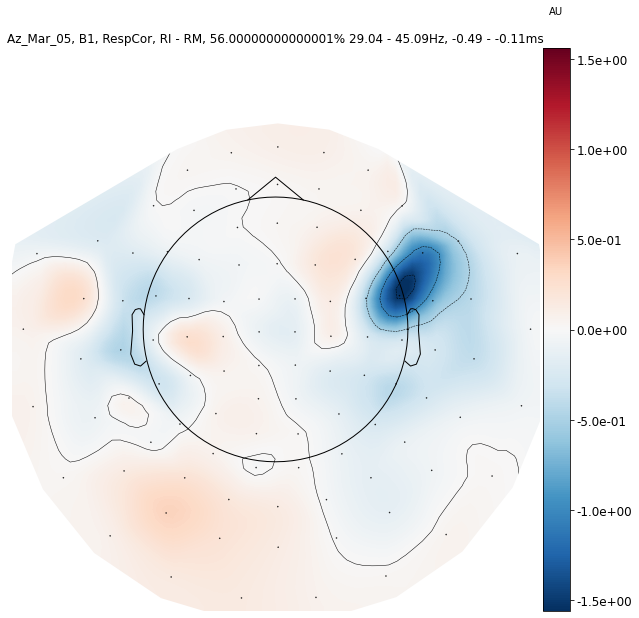

In [55]:
import itertools

for subject, subject_content in baselined_data.items():
    for session, session_content in subject_content.items():
        for trial, trial_content in session_content.items():
            keys = sorted(list(trial_content.keys()))
            for case1, case2 in itertools.combinations(keys, 2):
                power = AverageTFR(
                    trial_content[case1].info,
                    trial_content[case1].data - trial_content[case2].data,
                    trial_content[case1].times,
                    trial_content[case1].freqs,
                    trial_content[case1].nave,
                    trial_content[case1].comment,
                    trial_content[case1].method
                )
                # plt.rcParams["figure.figsize"] = (15, 10)
                # power.plot_topo(
                #     mode='logratio',
                #     title=f'Average power, '
                #           f'{subject}, {session}, {trial}, {case1} - {case2}',
                #     fig_facecolor='w',
                #     font_color='black',
                #     vmin=-2, vmax=2
                # )
                if session == 'B1_':
                    session = 'B1'
                if f'{case1}_vs_{case2}.pkl'.lower() in best_configs[subject][session][trial]:
                    config = list(
                        best_configs[subject][session][trial][f'{case1}_vs_{case2}.pkl'.lower()].keys()
                    )[0]
                    acc = list(
                        best_configs[subject][session][trial][f'{case1}_vs_{case2}.pkl'.lower()].values()
                    )[0]
                elif f'{case2}_vs_{case1}.pkl'.lower() in best_configs[subject][session][trial]:
                    config = list(
                        best_configs[subject][session][trial][f'{case2}_vs_{case1}.pkl'.lower()].keys()
                    )[0]
                    acc = list(
                        best_configs[subject][session][trial][f'{case2}_vs_{case1}.pkl'.lower()].values()
                    )[0]
                else:
                    config = None
                    acc = None
                if config is not None:
                    f, t = config
                    fmin, fmax = f
                    tmin, tmax = t
                    print(
                        f'Average power, '
                              f'{subject}, {session}, {trial}, {case1} - {case2},'
                        f' {np.round(fmin, 2)} - {np.round(fmax, 2)}, {np.round(tmin, 2)} - {np.round(tmax, 2)}',
                    )
                    plt.rcParams["figure.figsize"] = (20, 20)
                    power.plot_topomap(
                        title=f'{subject}, {session}, {trial}, {case1} - {case2}, {np.round(acc, 2)*100}%,'
                        f' {np.round(fmin, 2)} - {np.round(fmax, 2)}Hz, {np.round(tmin, 2)} - {np.round(tmax, 2)}ms',
                        tmin=tmin,
                        tmax=tmax,
                        fmin=fmin,
                        fmax=fmax,
                        size=10
                    )